# Personal Energy Usage 
<hr/>
<hr/>

In [197]:
# vis 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
sns.set(rc = {'figure.figsize': (11,8)})

# pliers
import pandas as pd
import numpy as np

from datetime import datetime


# Contents
- [Data Ingestion](#Data-Ingenstion)
- [Data Clean Up](#Data-Clean-up)
    - [Propaine Data](#Propaine-Data)
    - [Temperature Data](#Temperature-Data)
- [Visualize](#EDA---Visualize)
    - [Temperature Vis](#Temperature-Vis)
    - [Gasoline Vis](#Gasoline-Vis)
    - [Propaine Vis](#Propaine-Vis)

# Data Ingestion

In [157]:
propaine_df = pd.read_excel('../data/gas_used.xlsx')
print(propaine_df.shape)
propaine_df.head()

(7, 6)


,invoice number,transaction date,cost,gal,Environmental Compliance Fee,cost per gal
0,NaN,NaT,NaN,NaN,NaN,NaN
1,NaN,NaT,NaN,NaN,NaN,NaN
2,676952.0,2020-10-02,117.04,55.3,6.99,1.99
3,681181.0,2020-11-25,320.20,103.5,6.99,NaN
4,685620.0,2020-12-26,205.99,100.0,6.99,1.99


### Data Dictonary for Temp data

T2M_RANGE MERRA2 1/2x1/2 Temperature Range at 2 Meters (C) 							
T2M_MAX MERRA2 1/2x1/2 Maximum Temperature at 2 Meters (C) 							
T2M_MIN MERRA2 1/2x1/2 Minimum Temperature at 2 Meters (C) 							
T2M MERRA2 1/2x1/2 Temperature at 2 Meters (C) 							
TS MERRA2 1/2x1/2 Earth Skin Temperature (C) 							
T2MDEW MERRA2 1/2x1/2 Dew/Frost Point at 2 Meters (C) 							
T2MWET MERRA2 1/2x1/2 Wet Bulb Temperature at 2 Meters (C) 							


In [158]:
# temp data from 

temp_df = pd.read_csv('../data/Daily_20200801_20210225_041d77N_74d28W_89a594ff - POWER_SinglePoint_Daily_20200801_20210225_041d77N_74d28W_89a594ff.csv',
                      skiprows=16) #nrows=10
print(temp_df.shape)
temp_df.head(2)

(209, 12)


,LAT,LON,YEAR,MO,DY,T2M_RANGE,TS,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M
0,41.77451,-74.27729,2020,8,1,14.37,24.58,15.59,15.42,31.20,16.83,24.66
1,41.77451,-74.27729,2020,8,2,8.73,24.33,20.65,20.57,28.83,20.11,24.30


# Data Clean up 
<hr/>

## Propaine Data

In [159]:
propaine_df

,invoice number,transaction date,cost,gal,Environmental Compliance Fee,cost per gal
0,NaN,NaT,NaN,NaN,NaN,NaN
1,NaN,NaT,NaN,NaN,NaN,NaN
2,676952.0,2020-10-02,117.04,55.3,6.99,1.99
3,681181.0,2020-11-25,320.20,103.5,6.99,NaN
4,685620.0,2020-12-26,205.99,100.0,6.99,1.99
5,688270.0,2021-01-20,224.70,109.4,6.99,1.99
6,692265.0,2021-02-17,205.99,100.0,6.99,1.99


In [160]:
# drop the nan rows and redefine the dataframe

propaine_df = propaine_df.drop([0,1])
propaine_df.head()

,invoice number,transaction date,cost,gal,Environmental Compliance Fee,cost per gal
2,676952.0,2020-10-02,117.04,55.3,6.99,1.99
3,681181.0,2020-11-25,320.20,103.5,6.99,NaN
4,685620.0,2020-12-26,205.99,100.0,6.99,1.99
5,688270.0,2021-01-20,224.70,109.4,6.99,1.99
6,692265.0,2021-02-17,205.99,100.0,6.99,1.99


In [161]:
# rename columns

propaine_df.rename(columns = {'transaction date':'date','invoice number':'invoice'}, inplace = True)
propaine_df.head(1)

,invoice,date,cost,gal,Environmental Compliance Fee,cost per gal
2,676952.0,2020-10-02,117.04,55.3,6.99,1.99


In [162]:
# convert transaction date to timestamp

propaine_df['date'] = pd.to_datetime(propaine_df['date'])

In [163]:
# reset index 

propaine_df.reset_index(drop=True, inplace = True)
propaine_df.head(1)

,invoice,date,cost,gal,Environmental Compliance Fee,cost per gal
0,676952.0,2020-10-02,117.04,55.3,6.99,1.99


In [164]:
propaine_df['date'][2]

Timestamp('2020-12-26 00:00:00')

In [165]:
propaine_df

,invoice,date,cost,gal,Environmental Compliance Fee,cost per gal
0,676952.0,2020-10-02,117.04,55.3,6.99,1.99
1,681181.0,2020-11-25,320.20,103.5,6.99,NaN
2,685620.0,2020-12-26,205.99,100.0,6.99,1.99
3,688270.0,2021-01-20,224.70,109.4,6.99,1.99
4,692265.0,2021-02-17,205.99,100.0,6.99,1.99


In [166]:
# fill in NaN through calculation 

propaine_df['cost per gal'][1] = round((320.20 / 103.5),2)

<ipython-input-166-d538bfa2129a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  propaine_df['cost per gal'][1] = round((320.20 / 103.5),2)


In [178]:
propaine_df

,invoice,date,cost,gal,Environmental Compliance Fee,cost per gal
0,676952.0,2020-10-02,117.04,55.3,6.99,1.99
1,681181.0,2020-11-25,320.20,103.5,6.99,3.09
2,685620.0,2020-12-26,205.99,100.0,6.99,1.99
3,688270.0,2021-01-20,224.70,109.4,6.99,1.99
4,692265.0,2021-02-17,205.99,100.0,6.99,1.99


--- done

## Temperature Data

In [168]:
temp_df.head()

,LAT,LON,YEAR,MO,DY,T2M_RANGE,TS,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M
0,41.77451,-74.27729,2020,8,1,14.37,24.58,15.59,15.42,31.20,16.83,24.66
1,41.77451,-74.27729,2020,8,2,8.73,24.33,20.65,20.57,28.83,20.11,24.30
2,41.77451,-74.27729,2020,8,3,10.66,24.39,16.23,16.03,30.16,19.50,24.56
3,41.77451,-74.27729,2020,8,4,5.20,21.13,20.19,20.17,23.65,18.45,21.14
4,41.77451,-74.27729,2020,8,5,10.10,20.91,16.51,16.40,26.28,16.19,21.01


In [169]:
# creating datatime from multiply columns
#  pandas 18 pd.to_datetime(df[['year', 'month', 'day']]) columns have to be that name

temp_df['DATE'] = pd.to_datetime((temp_df.YEAR*10000+temp_df.MO*100+temp_df.DY).apply(str),format='%Y%m%d')

In [170]:
# Remove old date columns

temp_df.drop(['YEAR','MO','DY'], axis = 1, inplace = True)

In [171]:
# set datetime to index

#temp_df.set_index('DATE', inplace = True)


In [179]:
temp_df.head(2)

,LAT,LON,T2M_RANGE,TS,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M,DATE
0,41.77451,-74.27729,14.37,76.244,15.59,15.42,31.20,16.83,76.388,2020-08-01
1,41.77451,-74.27729,8.73,75.794,20.65,20.57,28.83,20.11,75.740,2020-08-02


In [180]:
temp_df.tail(3)

,LAT,LON,T2M_RANGE,TS,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M,DATE
204,41.77451,-74.27729,10.78,12.992,-9.77,-8.98,-3.21,-13.99,17.258,2021-02-21
205,41.77451,-74.27729,10.64,23.846,-4.71,-4.58,-0.83,-11.48,23.972,2021-02-22
206,41.77451,-74.27729,6.09,29.102,-1.76,-1.62,0.36,-5.72,29.318,2021-02-23


Row 207 & 208 have incorrect data and need to be dropped

In [174]:
# Drop row 207 & 208

temp_df.drop([207,208], axis = 0, inplace = True)

In [175]:
# converts C to F 

# lambda function C to F
c_to_f = lambda x : (x * 9/5) + 32 
# apply lambda to TS & T2M
temp_df['TS'] = c_to_f(temp_df['TS'])
temp_df['T2M'] = c_to_f(temp_df['T2M'])

In [181]:
temp_df.head(2)

,LAT,LON,T2M_RANGE,TS,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M,DATE
0,41.77451,-74.27729,14.37,76.244,15.59,15.42,31.20,16.83,76.388,2020-08-01
1,41.77451,-74.27729,8.73,75.794,20.65,20.57,28.83,20.11,75.740,2020-08-02


In [183]:
# simplyfy dataset

# creates a list of columns to drop
column_name = temp_df.columns
column_name = column_name.drop(['T2M','DATE','TS'])
# drops columns
temp_df.drop(column_name, inplace = True, axis = 1)
# rename to lower case 
temp_df.columns = map(str.lower, temp_df.columns)

In [187]:
# set datetime to index 

temp_df.set_index('date', inplace = True)

In [193]:
# Timdelta, duration of data

temp_df.index.max() - temp_df.index.min()

Timedelta('206 days 00:00:00')

In [188]:
temp_df

,ts,t2m
date,,
2020-08-01,76.244,76.388
2020-08-02,75.794,75.740
2020-08-03,75.902,76.208
2020-08-04,70.034,70.052
2020-08-05,69.638,69.818
...,...,...
2021-02-19,21.218,21.452
2021-02-20,19.166,19.310
2021-02-21,12.992,17.258


# EDA - Visualize
<hr/>

### Temperature Vis

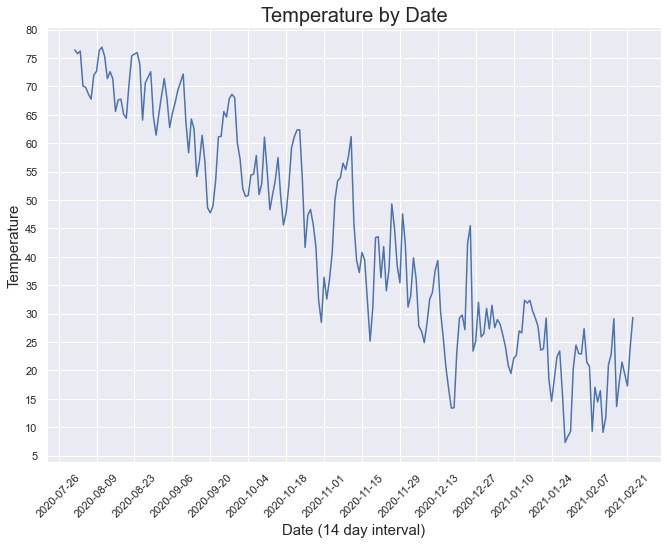

In [189]:
# Temperature Vis

plt.figure(figsize = (11,8))
ax = sns.lineplot(data = temp_df, x = 'date',
                             y = 't2m',
                             );

# x & y labels
plt.title('Temperature by Date', size = 20)
plt.xlabel('Date (14 day interval)', size = 15)
plt.ylabel('Temperature', size = 15)

# add more date ticks
ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
# add more temp ticks
ax.xaxis.set_major_locator(ticker.MultipleLocator(14))
    #ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
# rotate xticks
plt.xticks(rotation = 45);



# to save fig
#plt.savefig()

### Propaine Vis

In [151]:
propaine_df

,invoice,date,cost,gal,Environmental Compliance Fee,cost per gal
0,676952.0,2020-10-02,117.04,55.3,6.99,3.09
1,681181.0,2020-11-25,320.20,103.5,6.99,3.09
2,685620.0,2020-12-26,205.99,100.0,6.99,3.09
3,688270.0,2021-01-20,224.70,109.4,6.99,3.09
4,692265.0,2021-02-17,205.99,100.0,6.99,3.09


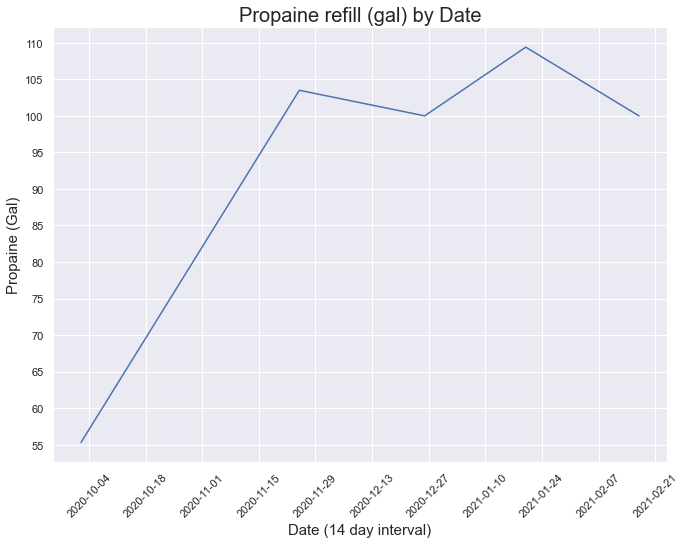

In [148]:
# Propaine Vis

plt.figure(figsize = (11,8))
ax = sns.lineplot(data = propaine_df, x = 'date',
                             y = 'gal',
                             hue = );

# x & y labels
plt.title('Propaine refill (gal) by Date', size = 20)
plt.xlabel('Date (14 day interval)', size = 15)
plt.ylabel('Propaine (Gal)', size = 15)

# add more date ticks
ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
# add more temp ticks
ax.xaxis.set_major_locator(ticker.MultipleLocator(14))
    #ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
# rotate xticks
plt.xticks(rotation = 45);


In [190]:
propaine_df['date']

0   2020-10-02
1   2020-11-25
2   2020-12-26
3   2021-01-20
4   2021-02-17
Name: date, dtype: datetime64[ns]

In [153]:
len(propaine_df['date'])

5

In [209]:
date_start = datetime(2021,8,1)
date_start


datetime.datetime(2021, 8, 1, 0, 0)

In [220]:
date_start = temp_df.index.min()

In [234]:
date_start + pd.Timedelta(days=1)

Timestamp('2020-08-02 00:00:00')

In [231]:
temp_df.loc[date_start: (date_start + pd.Timedelta(days=1))]

,ts,t2m
date,,
2020-08-01,76.244,76.388
2020-08-02,75.794,75.740


In [238]:
propaine_df['date'][0]

Timestamp('2020-10-02 00:00:00')

In [260]:
new_df = pd.DataFrame()

In [271]:
new_df['date'] = propaine_df['date'][0], 75

In [274]:
#new_df['temp'] = 75

In [273]:
new_df

,date
0,2020-10-02 00:00:00
1,75


In [270]:

new df 
# var for loop 
date_start
date_end
new_df
# LOOP, n of entries in propaine
    copy start 
    copy end
    
    # .loc[ date start (n) : date end (n+1) ]
        # avg ts 
        # write average to new_df[date_start]
        # write n a
        

SyntaxError: invalid syntax (<ipython-input-270-9841a209f914>, line 1)